<a href="https://colab.research.google.com/github/Sonali1503/ForageBCG_Tasks/blob/main/ForageBCGTask3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Importing Libraries:**


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
%matplotlib inline
import datetime
import pickle

In [ ]:
date_list = ['date_activ','date_end','date_first_activ','date_modif_prod','date_renewal']
main = pd.read_csv("https://cdn.theforage.com/vinternships/companyassets/SKZxezskWgmFjRvj9/BqF6gmrmLunCkdqKM/1639044685365/client_data.csv")
hist = pd.read_csv("https://cdn.theforage.com/vinternships/companyassets/SKZxezskWgmFjRvj9/BqF6gmrmLunCkdqKM/1639044717433/price_data.csv", parse_dates=['price_date'])

In [ ]:
main.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [ ]:
hist.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


**After doing some feature engineering:**

In [ ]:
main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [ ]:
main.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

There are **no null values**. We can move ahead.

**Correlation:**

In [ ]:
main.corr()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
cons_12m,1.000000,0.488474,0.968212,0.193947,0.167093,-0.043282,0.065268,-0.007748,0.145908,-0.026566,0.159711,-0.011926,-0.011905,0.154251,0.133614,-0.003565,0.082889,-0.045968
cons_gas_12m,0.488474,1.000000,0.507007,0.084359,0.080934,-0.012595,0.041393,-0.017684,0.074002,-0.020558,0.077846,0.006868,0.006852,0.239387,0.070867,-0.013815,0.054317,-0.037957
cons_last_month,0.968212,0.507007,1.000000,0.177773,0.193574,-0.040874,0.057476,-0.005187,0.136802,-0.023017,0.187034,-0.011498,-0.011477,0.169099,0.121835,-0.003677,0.074529,-0.045284
forecast_cons_12m,0.193947,0.084359,0.177773,1.000000,0.647727,0.058435,0.305627,-0.135646,0.254056,-0.018477,0.634600,-0.023220,-0.023231,0.055915,0.768537,0.021283,0.393946,0.012949
forecast_cons_year,0.167093,0.080934,0.193574,0.647727,1.000000,0.008518,0.276009,-0.158012,0.251005,-0.044190,0.969395,-0.010759,-0.010727,0.040426,0.464928,0.048248,0.309647,-0.002558
forecast_discount_energy,-0.043282,-0.012595,-0.040874,0.058435,0.008518,1.000000,-0.008388,0.353735,0.059318,0.048024,0.037939,0.241142,0.240421,0.106812,0.079784,-0.070697,-0.005032,0.017026
forecast_meter_rent_12m,0.065268,0.041393,0.057476,0.305627,0.276009,-0.008388,1.000000,-0.579353,0.706376,-0.203089,0.224212,0.183509,0.183566,0.018109,0.275830,0.071558,0.618549,0.044245
forecast_price_energy_off_peak,-0.007748,-0.017684,-0.005187,-0.135646,-0.158012,0.353735,-0.579353,1.000000,-0.330138,0.630377,-0.092535,0.094498,0.094216,0.035093,-0.135107,-0.168095,-0.384397,-0.010837
forecast_price_energy_peak,0.145908,0.074002,0.136802,0.254056,0.251005,0.059318,0.706376,-0.330138,1.000000,-0.242017,0.212317,0.165483,0.165560,0.044141,0.234942,0.080260,0.411532,0.029315
forecast_price_pow_off_peak,-0.026566,-0.020558,-0.023017,-0.018477,-0.044190,0.048024,-0.203089,0.630377,-0.242017,1.000000,-0.011318,-0.061869,-0.061925,-0.005335,-0.072623,-0.120136,-0.095897,0.014778


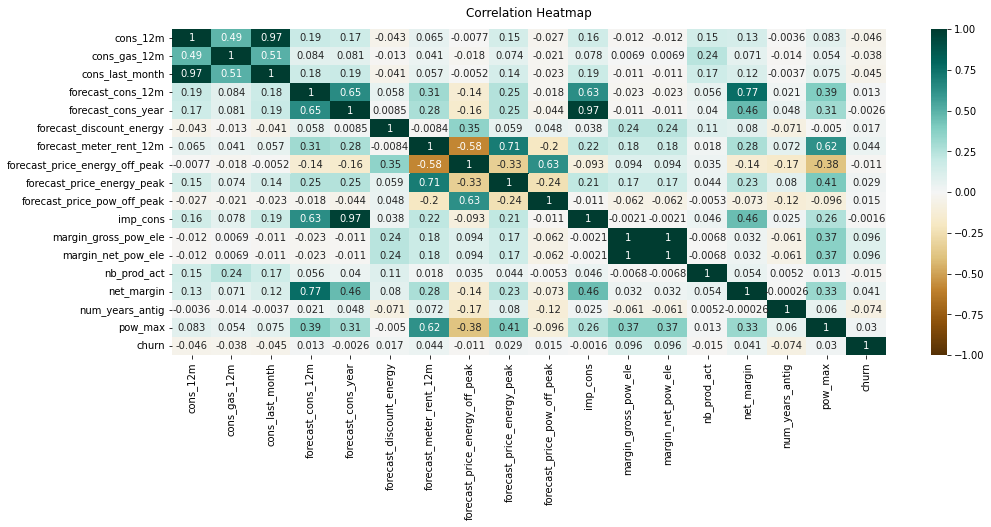

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(main.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Since cons_12m and cons_last_month are highly correlated(0.92), one needs to be dropped

In [ ]:
main=main.drop(columns= ["cons_last_month", "forecast_cons_year", "num_years_antig" ])
main.head()

,id,channel_sales,cons_12m,cons_gas_12m,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [ ]:
hist.corr()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
price_off_peak_var,1.000000,-0.328580,-0.594872,0.417097,-0.630018,-0.572229
price_peak_var,-0.328580,1.000000,0.821353,-0.098627,0.796097,0.807759
price_mid_peak_var,-0.594872,0.821353,1.000000,-0.137848,0.973960,0.979717
price_off_peak_fix,0.417097,-0.098627,-0.137848,1.000000,-0.000428,-0.252661
price_peak_fix,-0.630018,0.796097,0.973960,-0.000428,1.000000,0.927308
price_mid_peak_fix,-0.572229,0.807759,0.979717,-0.252661,0.927308,1.000000


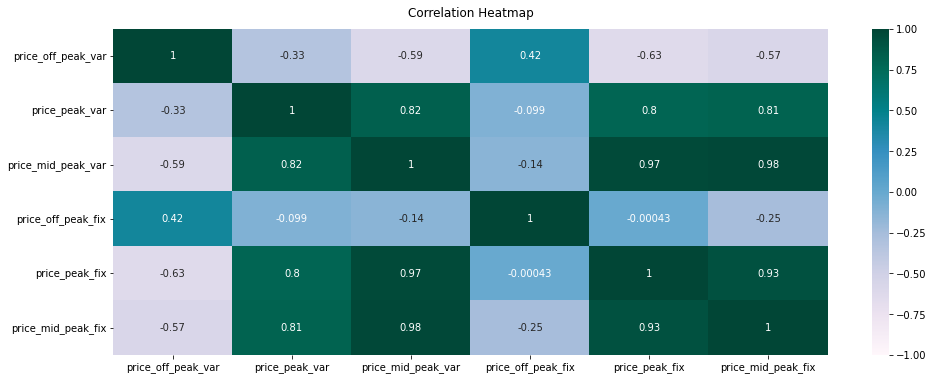

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(hist.corr(), vmin=-1, vmax=1, annot=True, cmap='PuBuGn')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Since price_p2_fix and price_p3_var are highly correlated(0.97), one needs to be dropped.

**Skewness:**

In [ ]:
main.skew()

cons_12m                           5.997308
cons_gas_12m                       9.597530
forecast_cons_12m                  7.155853
forecast_discount_energy           5.155098
forecast_meter_rent_12m            1.505148
forecast_price_energy_off_peak    -0.119586
forecast_price_energy_peak        -0.014331
forecast_price_pow_off_peak       -4.998772
imp_cons                          13.198799
margin_gross_pow_ele               4.472632
margin_net_pow_ele                 4.473326
nb_prod_act                        8.636878
net_margin                        36.569515
pow_max                            5.786785
churn                              2.720715
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


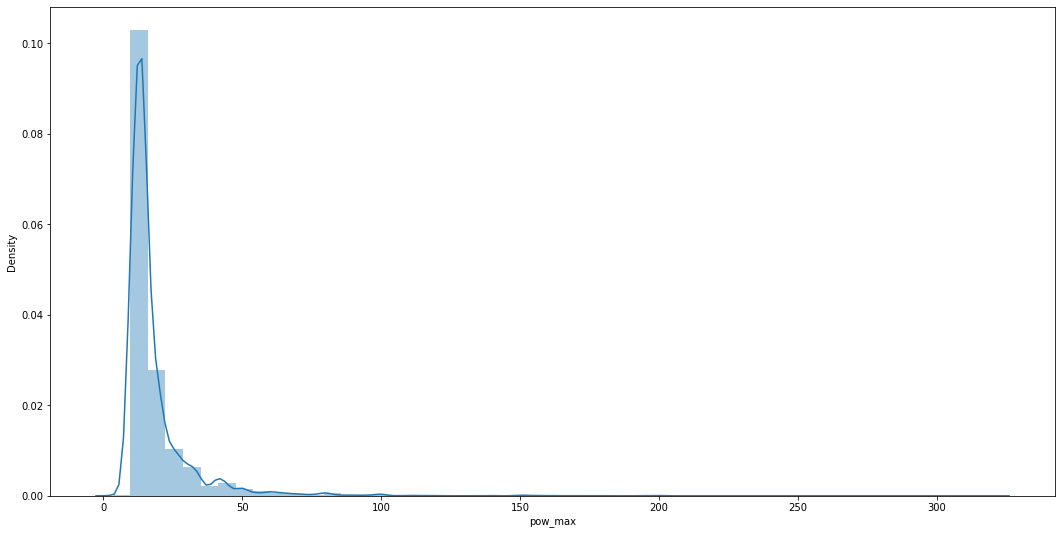

In [ ]:
fig, axs = plt.subplots(figsize=(18,9))
sns.distplot(main['pow_max'], hist=True)